# **Interpolation and Approximation**

This notebooks shows how to implement the following methods
- `lagrange`
- `newtonpoly`
- `chebyshevNodes`
- `newtonMod`
- `lspoly`

In [1]:
# this is not a necessary import, I just have it here because vscode requires it
# to run the script in the same directory as the script
# and not the directory where the script is located

import sys

sys.path.append("..")

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

---

## **Lagrange Interpolation**

The cell demonstrates how to use the `lagrange` function to compute polynomial interpolation for a given function. The function computes:

1. A Lagrange interpolation polynomial for the provided data points
2. The coefficients of this polynomial in descending order
3. The Lagrange basis polynomials

### Parameters
- `x`: list[float] - The x-coordinates of the data points
- `y`: list[float] - The y-coordinates of the data points

### Returns
- `tuple[np.ndarray, np.ndarray]`: A tuple containing:
    - The coefficients of the interpolation polynomial in descending order
    - The Lagrange basis polynomials

The example below shows interpolation of the function `g(x) = arctan(x) / (log(x²) + 3*x)` using 5 points in the interval [-5, -1].


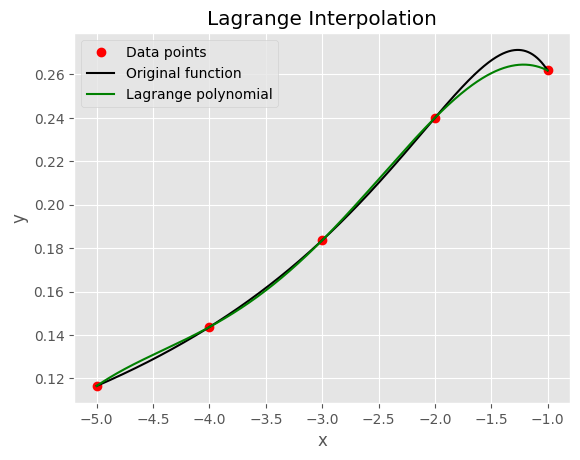

In [38]:
from functions.interp import lagrange

g = lambda x: np.arctan(x) / (np.log(np.power(x, 2)) + 3*x)

t1 = -5
t2 = -1
n = 4

x = np.linspace(t1, t2, n+1)
y = g(x)

c, Lk = lagrange(x, y)

plt.figure()
plt.plot(x, y, 'ro')
plt.plot(np.linspace(t1, t2, 1000), g(np.linspace(t1, t2, 1000)), 'k-')
plt.plot(np.linspace(t1, t2, 1000), np.polyval(c, np.linspace(t1, t2, 1000)), c='green')
plt.title("Lagrange Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(['Data points', 'Original function', 'Lagrange polynomial'])
plt.plot
plt.show()

---

## **Cubic Spline Interpolation**

The cubic spline interpolation technique creates smooth curves that pass through a given set of data points. This method connects data points with piecewise cubic polynomials, ensuring continuity of the function and its first and second derivatives.

The `CubicSpline` class supports various boundary conditions:

- **Natural**: Second derivatives at endpoints are zero (default)
- **Clamped**: First derivatives at endpoints are specified
- **Known**: Second derivatives at endpoints are specified
- **Parabolic**: Boundary segments are parabolic instead of cubic
- **Extrapolated**: First derivatives at endpoints are extrapolated

The example below demonstrates different types of cubic spline interpolation on the same dataset with varying boundary conditions, visualizing how each method affects the resulting curve behavior.

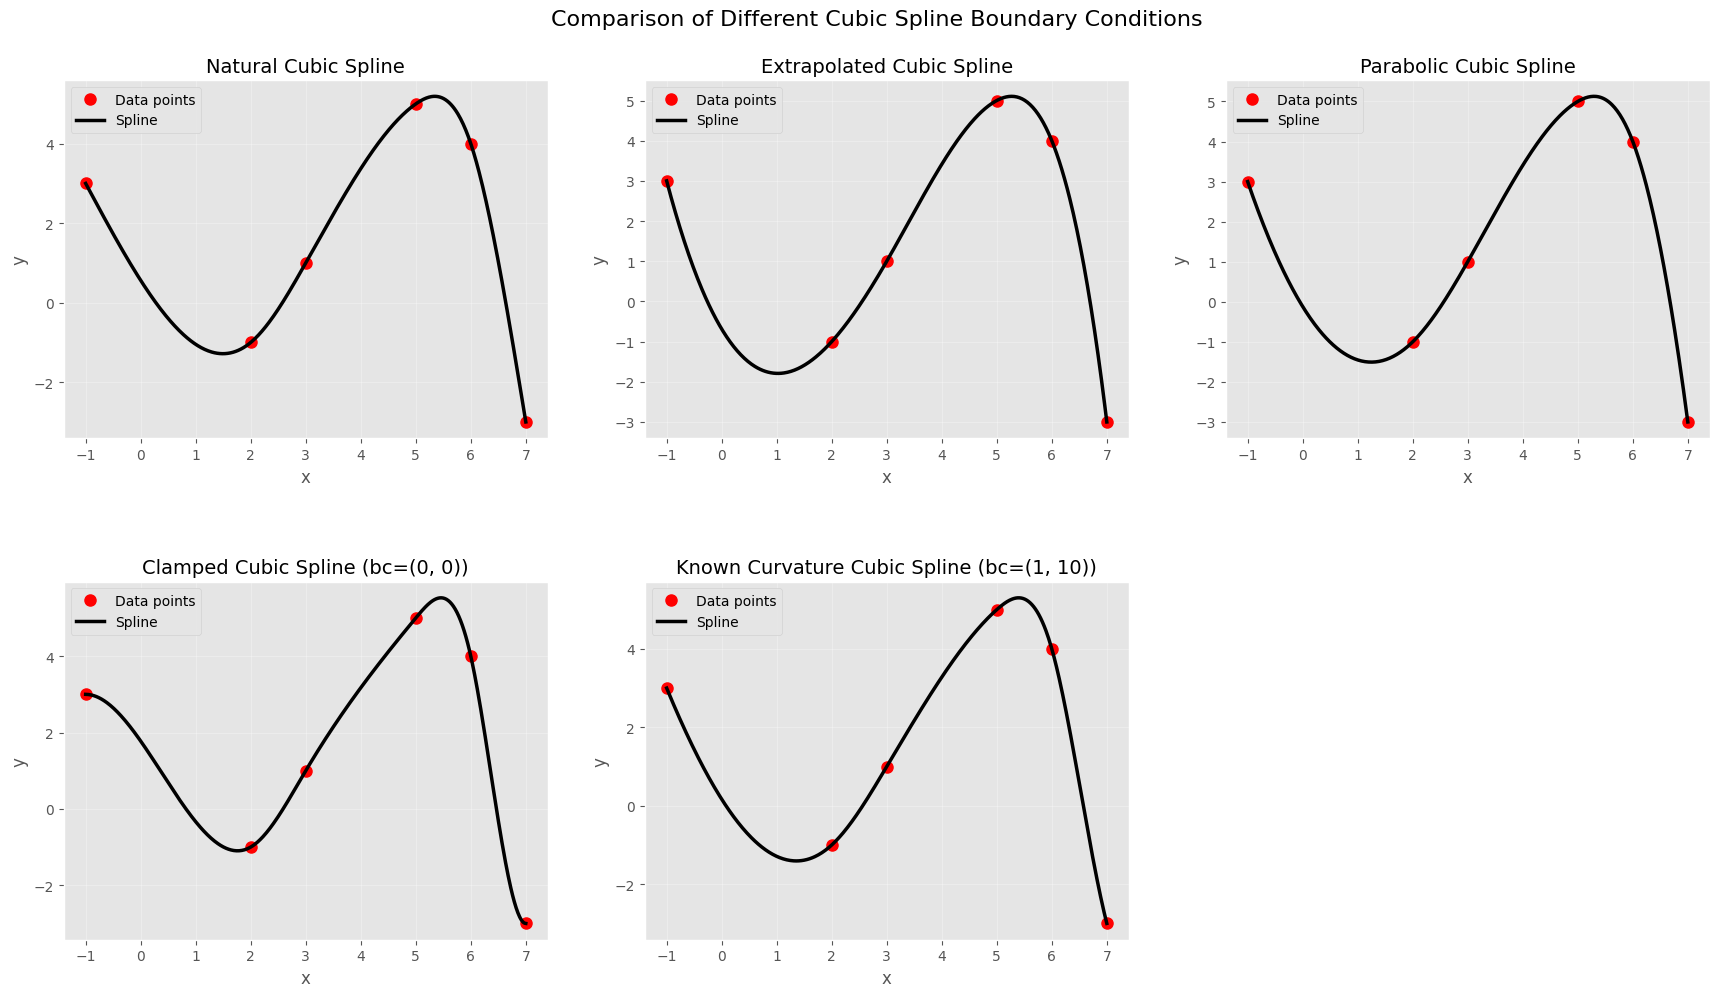

In [54]:
import functions.cb_spline as cb

x = [-1, 2, 3, 5, 6, 7]
y = [3, -1, 1, 5, 4, -3]

s1 = cb.CubicSpline(x,y,bc_type="natural")
s2 = cb.CubicSpline(x,y,bc_type="extrapolated")
s3 = cb.CubicSpline(x,y,bc_type="parabolic")
s4 = cb.CubicSpline(x,y,bc_type="clamped", bc=(0, 0))
s5 = cb.CubicSpline(x,y,bc_type="known", bc=(1, 10))

# Create a 2x3 grid of plots with better spacing
fig, ax = plt.subplots(2, 3, figsize=(18, 10))
fig.tight_layout(pad=4.0)

# Generate smooth x points for plotting
x_smooth = np.linspace(-1, 7, 500)

# Common styling for all plots
plot_styles = {
    'data_points': {'marker': 'o', 'markersize': 8, 'color': 'red', 'linestyle': 'none', 'label': 'Data points'},
    'spline': {'linewidth': 2.5, 'color': 'black', 'label': 'Spline'}
}

# Create plots with enhanced styling
ax[0, 0].plot(x, y, **plot_styles['data_points'])
ax[0, 0].plot(x_smooth, s1(x_smooth), **plot_styles['spline'])
ax[0, 0].set_title("Natural Cubic Spline", fontsize=14)
ax[0, 0].grid(True, alpha=0.3)

ax[0, 1].plot(x, y, **plot_styles['data_points'])
ax[0, 1].plot(x_smooth, s2(x_smooth), **plot_styles['spline'])
ax[0, 1].set_title("Extrapolated Cubic Spline", fontsize=14)
ax[0, 1].grid(True, alpha=0.3)

ax[0, 2].plot(x, y, **plot_styles['data_points'])
ax[0, 2].plot(x_smooth, s3(x_smooth), **plot_styles['spline'])
ax[0, 2].set_title("Parabolic Cubic Spline", fontsize=14)
ax[0, 2].grid(True, alpha=0.3)

ax[1, 0].plot(x, y, **plot_styles['data_points'])
ax[1, 0].plot(x_smooth, s4(x_smooth), **plot_styles['spline'])
ax[1, 0].set_title("Clamped Cubic Spline (bc=(0, 0))", fontsize=14)
ax[1, 0].grid(True, alpha=0.3)

ax[1, 1].plot(x, y, **plot_styles['data_points'])
ax[1, 1].plot(x_smooth, s5(x_smooth), **plot_styles['spline'])
ax[1, 1].set_title("Known Curvature Cubic Spline (bc=(1, 10))", fontsize=14)
ax[1, 1].grid(True, alpha=0.3)

# Add a legend to the last subplot
for i in range(2):
    for j in range(3):
        if i < 2 and j < 3 and not (i == 1 and j == 2):
            ax[i, j].legend(fontsize=10)
            ax[i, j].set_xlabel("x", fontsize=12)
            ax[i, j].set_ylabel("y", fontsize=12)

# Hide the unused subplot
ax[1, 2].axis('off')

# Add a main title
fig.suptitle("Comparison of Different Cubic Spline Boundary Conditions", fontsize=16, y=1.01)

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()